In [1]:
import rioxarray as rxr

%matplotlib inline

In [2]:
mille_tiff = rxr.open_rasterio('../data/bathybase/bathy_tiffs/mille_lacs.tiff')

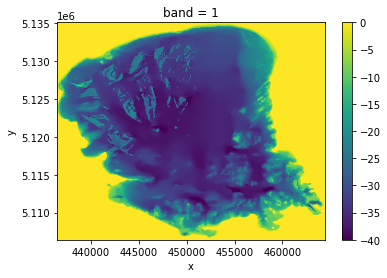

In [3]:
mille_tiff.plot()

In [3]:
mille_tiff

<xarray.DataArray (band: 1, y: 5740, x: 5586)>
[32063640 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.365e+05 4.365e+05 ... 4.644e+05 4.644e+05
  * y            (y) float64 5.135e+06 5.135e+06 ... 5.106e+06 5.106e+06
    spatial_ref  int64 0
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0

In [4]:
import pyproj
from pystac_client import Client
import stackstac

In [5]:
wgs84 = pyproj.CRS('EPSG:4326')

In [6]:
bounding_box = mille_tiff.rio.transform_bounds(wgs84)
left, bottom, right, top = bounding_box
latitude = (bottom, top)
longitude = (left, right)

In [7]:
from display_map import display_map

In [8]:
display_map(latitude, longitude)

In [9]:
aws_stac_url = "https://earth-search.aws.element84.com/v0"
catalog = Client.open(aws_stac_url)

In [10]:
%%time
collections = ["sentinel-s2-l2a-cogs"]
items = catalog.search(collections=collections, bbox=bounding_box, datetime="2020-10-01/2021-10-01").get_all_items()
len(items)

CPU times: user 48.2 ms, sys: 1.43 ms, total: 49.6 ms
Wall time: 1.46 s


73

In [11]:
stack = stackstac.stack(items)

In [12]:
stack

<xarray.DataArray 'stackstac-4cd45965538a4be8dfb6b27811db140e' (time: 73, band: 17, y: 10980, x: 10980)>
dask.array<fetch_raster_window, shape=(73, 17, 10980, 10980), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * time                        (time) datetime64[ns] 2020-10-01T17:20:57 ......
    id                          (time) <U24 'S2A_15TVM_20201001_0_L2A' ... 'S...
  * band                        (band) <U8 'overview' 'visual' ... 'WVP' 'SCL'
  * x                           (x) float64 4e+05 4e+05 ... 5.097e+05 5.098e+05
  * y                           (y) float64 5.2e+06 5.2e+06 ... 5.09e+06
    instruments                 <U3 'msi'
    sentinel:latitude_band      <U1 'T'
    eo:cloud_cover              (time) float64 30.95 61.42 95.41 ... 84.8 99.99
    updated                     (time) <U24 '2020-10-02T10:08:57.934Z' ... '2...
    proj:epsg                   int64 32615
    sentinel:sequence           (time) <U1 '0' '0' '0' '0' ... '0' '0' '0' '1'
    view:off_nadir              int64 0
    sentinel:product_id         (time) <U60 'S2A_MSIL2A_20201001T171131_N0214...
    gsd                         (band) object 10 10 60 10 ... 20 None None None
    sentinel:grid_square        <U2 'VM'
    platform                    (time) <U11 'sentinel-2a' ... 'sentinel-2b'
    constellation               <U10 'sentinel-2'
    sentinel:utm_zone           int64 15
    created                     (time) <U24 '2020-10-02T10:08:57.934Z' ... '2...
    sentinel:valid_cloud_cover  (time) bool True True True ... True True True
    sentinel:data_coverage      (time) float64 100.0 100.0 100.0 ... 100.0 74.92
    title                       (band) <U31 'True color image' ... 'Scene Cla...
    common_name                 (band) object None None 'coastal' ... None None
    center_wavelength           (band) object None None 0.4439 ... None None
    full_width_half_max         (band) object None None 0.027 ... None None None
    epsg                        int64 32615
Attributes:
    spec:        RasterSpec(epsg=32615, bounds=(399960.0, 5090220.0, 509760.0...
    crs:         epsg:32615
    transform:   | 10.00, 0.00, 399960.00|\n| 0.00,-10.00, 5200020.00|\n| 0.0...
    resolution:  10.0

In [13]:
lowcloud = stack[stack['eo:cloud_cover'] < 10]

In [14]:
lowcloud

<xarray.DataArray 'stackstac-4cd45965538a4be8dfb6b27811db140e' (time: 19, band: 17, y: 10980, x: 10980)>
dask.array<getitem, shape=(19, 17, 10980, 10980), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * time                        (time) datetime64[ns] 2020-11-05T17:20:54 ......
    id                          (time) <U24 'S2B_15TVM_20201105_0_L2A' ... 'S...
  * band                        (band) <U8 'overview' 'visual' ... 'WVP' 'SCL'
  * x                           (x) float64 4e+05 4e+05 ... 5.097e+05 5.098e+05
  * y                           (y) float64 5.2e+06 5.2e+06 ... 5.09e+06
    instruments                 <U3 'msi'
    sentinel:latitude_band      <U1 'T'
    eo:cloud_cover              (time) float64 8.06 0.03 0.01 ... 5.65 0.07 0.14
    updated                     (time) <U24 '2020-11-06T02:07:26.032Z' ... '2...
    proj:epsg                   int64 32615
    sentinel:sequence           (time) <U1 '0' '0' '0' '0' ... '0' '0' '0' '0'
    view:off_nadir              int64 0
    sentinel:product_id         (time) <U60 'S2B_MSIL2A_20201105T171519_N0214...
    gsd                         (band) object 10 10 60 10 ... 20 None None None
    sentinel:grid_square        <U2 'VM'
    platform                    (time) <U11 'sentinel-2b' ... 'sentinel-2a'
    constellation               <U10 'sentinel-2'
    sentinel:utm_zone           int64 15
    created                     (time) <U24 '2020-11-06T02:07:26.032Z' ... '2...
    sentinel:valid_cloud_cover  (time) bool True True True ... True True True
    sentinel:data_coverage      (time) float64 100.0 100.0 100.0 ... 100.0 100.0
    title                       (band) <U31 'True color image' ... 'Scene Cla...
    common_name                 (band) object None None 'coastal' ... None None
    center_wavelength           (band) object None None 0.4439 ... None None
    full_width_half_max         (band) object None None 0.027 ... None None None
    epsg                        int64 32615
Attributes:
    spec:        RasterSpec(epsg=32615, bounds=(399960.0, 5090220.0, 509760.0...
    crs:         epsg:32615
    transform:   | 10.00, 0.00, 399960.00|\n| 0.00,-10.00, 5200020.00|\n| 0.0...
    resolution:  10.0

In [15]:
rgb = lowcloud.sel(band=["B04", "B03", "B02"])

In [16]:
monthly = rgb.resample(time='MS').median('time', keep_attrs=True)

/home/jiahau/miniconda3/envs/odc_env/lib/python3.8/site-packages/dask/array/core.py:4458: PerformanceWarning: Increasing number of chunks by factor of 11
  result = blockwise(
/home/jiahau/miniconda3/envs/odc_env/lib/python3.8/site-packages/dask/array/core.py:4458: PerformanceWarning: Increasing number of chunks by factor of 11
  result = blockwise(


In [17]:
monthly

<xarray.DataArray 'stackstac-4cd45965538a4be8dfb6b27811db140e' (time: 11, band: 3, y: 10980, x: 10980)>
dask.array<where, shape=(11, 3, 10980, 10980), dtype=float64, chunksize=(2, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * time                    (time) datetime64[ns] 2020-11-01 ... 2021-09-01
  * band                    (band) <U8 'B04' 'B03' 'B02'
  * x                       (x) float64 4e+05 4e+05 ... 5.097e+05 5.098e+05
  * y                       (y) float64 5.2e+06 5.2e+06 ... 5.09e+06 5.09e+06
    instruments             <U3 'msi'
    sentinel:latitude_band  <U1 'T'
    proj:epsg               int64 32615
    view:off_nadir          int64 0
    gsd                     (band) object 10 10 10
    sentinel:grid_square    <U2 'VM'
    constellation           <U10 'sentinel-2'
    sentinel:utm_zone       int64 15
    title                   (band) <U31 'Band 4 (red)' ... 'Band 2 (blue)'
    common_name             (band) object 'red' 'green' 'blue'
    center_wavelength       (band) object 0.6645 0.56 0.4966
    full_width_half_max     (band) object 0.038 0.045 0.098
    epsg                    int64 32615
Attributes:
    spec:        RasterSpec(epsg=32615, bounds=(399960.0, 5090220.0, 509760.0...
    crs:         epsg:32615
    transform:   | 10.00, 0.00, 399960.00|\n| 0.00,-10.00, 5200020.00|\n| 0.0...
    resolution:  10.0

In [18]:
minx, miny, maxx, maxy = mille_tiff.rio.transform_bounds(monthly.crs)

In [19]:
aoi = monthly.sel(x=slice(minx, maxx), y=slice(maxy, miny))
aoi

<xarray.DataArray 'stackstac-4cd45965538a4be8dfb6b27811db140e' (time: 11, band: 3, y: 2870, x: 2793)>
dask.array<getitem, shape=(11, 3, 2870, 2793), dtype=float64, chunksize=(2, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * time                    (time) datetime64[ns] 2020-11-01 ... 2021-09-01
  * band                    (band) <U8 'B04' 'B03' 'B02'
  * x                       (x) float64 4.365e+05 4.365e+05 ... 4.644e+05
  * y                       (y) float64 5.135e+06 5.135e+06 ... 5.106e+06
    instruments             <U3 'msi'
    sentinel:latitude_band  <U1 'T'
    proj:epsg               int64 32615
    view:off_nadir          int64 0
    gsd                     (band) object 10 10 10
    sentinel:grid_square    <U2 'VM'
    constellation           <U10 'sentinel-2'
    sentinel:utm_zone       int64 15
    title                   (band) <U31 'Band 4 (red)' ... 'Band 2 (blue)'
    common_name             (band) object 'red' 'green' 'blue'
    center_wavelength       (band) object 0.6645 0.56 0.4966
    full_width_half_max     (band) object 0.038 0.045 0.098
    epsg                    int64 32615
Attributes:
    spec:        RasterSpec(epsg=32615, bounds=(399960.0, 5090220.0, 509760.0...
    crs:         epsg:32615
    transform:   | 10.00, 0.00, 399960.00|\n| 0.00,-10.00, 5200020.00|\n| 0.0...
    resolution:  10.0

In [20]:
%%time
data = aoi.compute()

/home/jiahau/miniconda3/envs/odc_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


CPU times: user 1min 26s, sys: 18.3 s, total: 1min 45s
Wall time: 7min 30s


In [27]:
mille_tiff.rio.resolution()

(5.0002907447194636, -4.99997935540072)

In [56]:
mille_tiff.shape

(1, 5740, 5586)

In [72]:
data.shape

(11, 3, 2870, 2793)

### Downsampling the depth raster to be the same dimension as data by bilinear (represented as 1)

In [118]:
mille_tiff_10m = mille_tiff.rio.reproject_match(data, resampling=1)

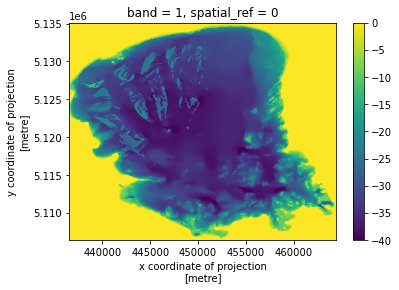

In [119]:
mille_tiff_10m.plot()

In [120]:
mille_tiff_10m.shape

(1, 2870, 2793)

In [121]:
mille_tiff_10m.rio.resolution()

(10.0, -10.0)

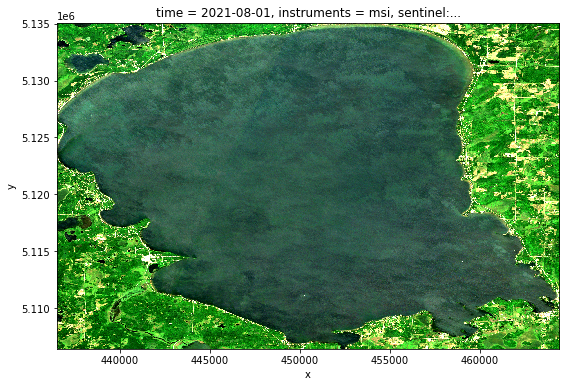

In [23]:
data.isel(time=9).plot.imshow(rgb="band", robust=True, size=6)

#### The multiple plot looks much dimmer.

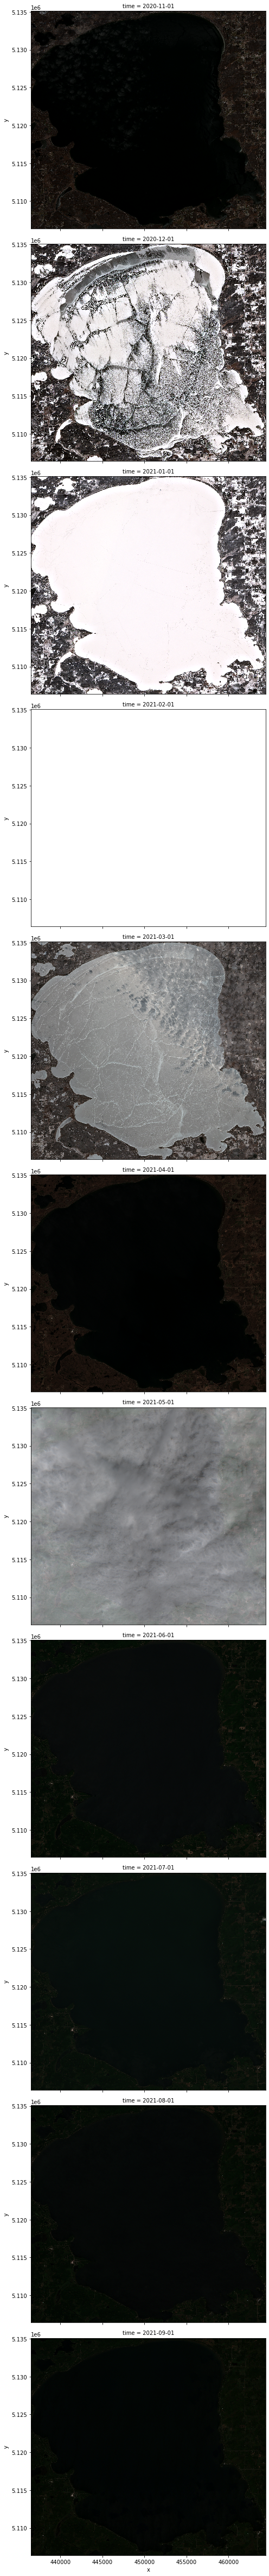

In [29]:
data.plot.imshow(row="time", rgb="band", robust=True, size=6)

In [104]:
![ -d ../data/mille_lacs_lake ] || mkdir ../data/mille_lacs_lake

In [131]:
out_dir = '../data/mille_lacs_lake/'
DEM_name = 'depth_r10m.tiff'

In [132]:
mille_tiff_10m.rio.to_raster(out_dir+DEM_name)

In [156]:
data.coords

Coordinates:
  * time                    (time) datetime64[ns] 2020-11-01 ... 2021-09-01
  * band                    (band) <U8 'B04' 'B03' 'B02'
  * x                       (x) float64 4.365e+05 4.365e+05 ... 4.644e+05
  * y                       (y) float64 5.135e+06 5.135e+06 ... 5.106e+06
    instruments             <U3 'msi'
    sentinel:latitude_band  <U1 'T'
    proj:epsg               int64 32615
    view:off_nadir          int64 0
    gsd                     (band) object 10 10 10
    sentinel:grid_square    <U2 'VM'
    constellation           <U10 'sentinel-2'
    sentinel:utm_zone       int64 15
    title                   (band) <U31 'Band 4 (red)' ... 'Band 2 (blue)'
    common_name             (band) object 'red' 'green' 'blue'
    center_wavelength       (band) object 0.6645 0.56 0.4966
    full_width_half_max     (band) object 0.038 0.045 0.098
    epsg                    int64 32615

### Save the visual data

In [242]:
for i in range(len(data.time)):
    # Check if it is an empty DataArray
    if data.isel(time=i).isnull().sum() != data.x.size * data.y.size * data.band.size:
        data.isel(time=i).rio.to_raster(out_dir+data.coords['time'][i].dt.strftime('%m-%d-%Y').to_numpy()+'.tiff')